## Take out cases from DBT study 20180308; Cview unchanged.
\# images for Processed tomo projection and reconstruction were incorrected in "type" column in the data frame. Use "Modality" to get the correct labelling.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys,os
from glob import glob
import re
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
sns.set_style("ticks")

In [2]:
parentdir='C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom'
csvs=glob(os.path.join(parentdir,'2017*_subset_*_mm', 'w*d*', 'sheet', 'TextureFeature_mean.csv'))
#csvs.append(os.path.join(parentdir, 'sheet', 'TextureFeature_mean.csv'))

In [3]:
csvs_cview=csvs[:8]
csvs_proc_pr=csvs[8:16]
csvs_raw_pr=csvs[16:24]
csvs_recon=csvs[24:32]
#csvs_proc_mg_silver=csvs[32:37]
#csvs_raw_mg_silver=csvs[37:42]
#csvs_proc_mg=csvs[42:47]
#csvs_raw_mg=csvs[47:]

In [4]:
dfs_merged=[]
for c in [csvs_recon, csvs_cview, csvs_proc_pr, csvs_raw_pr]:
    dfs=[]
    for i, f in enumerate(c):
        exp = f.split('\\')[8]
        d = exp.find('d')
        win = float(exp[1:d])
        sd = float(exp[d+1:])

        df=pd.read_csv(f, index_col=0)
        old_cols=df.columns
        new_cols = []
        for i in df.columns:
            if 'Edge' in i or 'LBP' in i:
                new_cols.append('%s' % i.split('_')[0])
            else:
                new_cols.append('%s %s' % (i.split('_')[0], i.split('_')[-1]))
        df.columns=new_cols
        kvp=[int(i.split('_')[0]) for i in df.index]
        mas=[int(i.split('_')[2]) for i in df.index]
        df['kVp']=kvp
        df['mAs']=mas
        df['AutoTimed']=True
        df['Exp']='w=d=%s mm' % win
        df['WindowSize']=win
        df['SlidingDistance']=sd
        if win == sd:
            df['Overlap']=False
        else:
            df['Overlap']=True
        non_autotimed_ind=df[(df['kVp']==31) & (df['mAs']!=42)].index
        df.loc[non_autotimed_ind, 'AutoTimed']=False
        dfs.append(df)

    df_merged=pd.concat(dfs)
    df_merged.sort_values(by=['WindowSize', 'SlidingDistance'], 
                          ascending=True, inplace=True)
    dfs_merged.append(df_merged)
    
df_recon_merged, df_cview_merged, df_proc_pr_merged, \
df_raw_pr_merged = dfs_merged

In [5]:
ref_cview='human_studies_cview_texture_mean_dcm_header_merged.csv'
ref_tomo='human_studies_tomo_texture_mean_dcm_header_merged.csv'
ref_mammo='human_studies_mammo_texture_mean_dcm_header_merged.csv'

In [17]:
dfs_ref=[]
for f in [ref_cview, ref_tomo, ref_mammo]:
    df=pd.read_csv(f, index_col=0, dtype={'AccessionNumber': str})
    new_cols=[i.replace('_', ' ') for i in df.columns]
    df.columns=new_cols
    dfs_ref.append(df)

df_ref_cview_merged,df_ref_tomo_merged, df_ref_mammo_merged=dfs_ref

In [7]:
df_cases=pd.read_csv('DBT_Case_Control_Texture/Cases_TOMO_TextureFeature_mean.csv', index_col=0)
cases_id=[i.split('_')[0] for i in df_cases.index]
cases_id=list(set(cases_id))

In [9]:
len(cases_id)

81

In [11]:
df_cases_2=pd.DataFrame(index=cases_id, columns=['CaseStatus'], data=np.ones((81,), dtype=np.bool))

In [12]:
df_cases_2

,CaseStatus
3231487,True
3055211,True
75003293,True
4899211,True
5208857,True
4850504,True
5266766,True
4038951,True
4531497,True
4025249,True


In [53]:
df_cases_2.dtypes

CaseStatus    bool
dtype: object

In [50]:
df_ref_tomo_merged.dtypes

Case Case                                object
EdgeEnhance                             float64
FD center                               float64
LBP                                     float64
cooccurrence clusterShade               float64
cooccurrence correlation                float64
cooccurrence energy                     float64
cooccurrence entropy                    float64
cooccurrence haralickCorrelation        float64
cooccurrence inertia                    float64
cooccurrence inverseDifferenceMoment    float64
graylevel 5th                           float64
graylevel 5thmean                       float64
graylevel 95th                          float64
graylevel 95thmean                      float64
graylevel entropy                       float64
graylevel kurtosis                      float64
graylevel max                           float64
graylevel mean                          float64
graylevel min                           float64
graylevel sigma                         

In [20]:
df_ref_tomo_merged=df_ref_tomo_merged.merge(df_cases_2, right_index=True, left_on='AccessionNumber', how='left')
df_ref_mammo_merged=df_ref_mammo_merged.merge(df_cases_2, right_index=True, left_on='AccessionNumber', how='left')

In [21]:
df_ref_merged=pd.concat([df_ref_mammo_merged, df_ref_tomo_merged, df_ref_cview_merged])

In [22]:
df_ref_tomo_merged['BodyPartThicknessStrata'].unique()

array(['(35, 45]', '(55, 65]', '(45, 55]', '(65, 75]', '(6, 35]',
       '(75, 85]', '(85, 133]'], dtype=object)

In [23]:
strata_order=['(6, 35]', '(35, 45]', '(45, 55]',
              '(55, 65]', '(65, 75]','(75, 85]', 
              '(85, 133]']

In [24]:
df_ref_tomo_merged['CaseStatus'].value_counts()

True    648
Name: CaseStatus, dtype: int64

In [29]:
df_ref_tomo_merged.loc[df_ref_tomo_merged['CaseStatus']!=True, 'CaseStatus']=False

In [55]:
df_ref_tomo_merged['CaseStatus'].value_counts()

False    3165
True      648
Name: CaseStatus, dtype: int64

In [54]:
df_ref_tomo_merged['CaseStatus']=df_ref_tomo_merged.CaseStatus.astype(np.bool)

Text(0.5,0.98,u'Reconstruction')

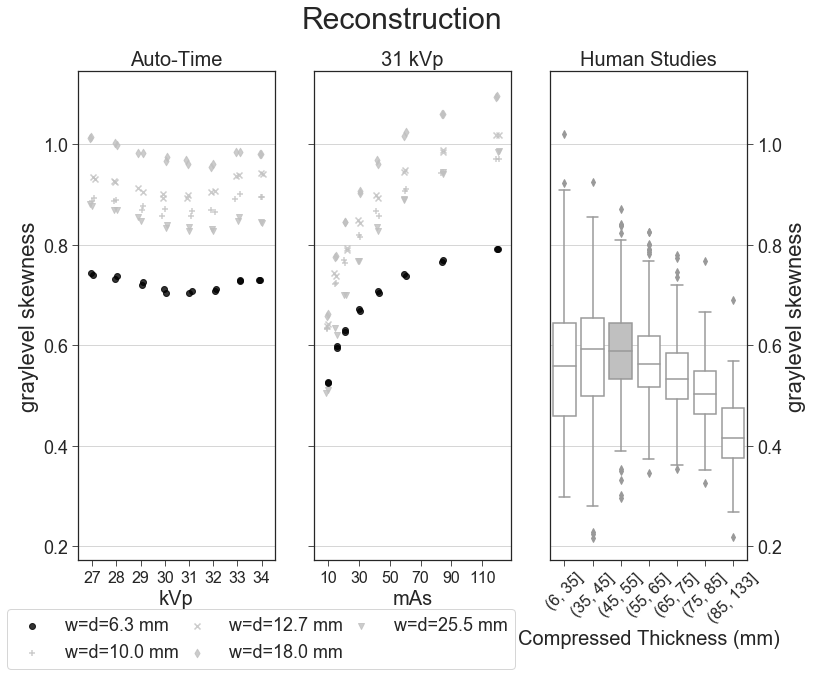

In [105]:
figdir = 'figures_combined_20180308'
if not os.path.isdir(figdir):
    os.makedirs(figdir)
feature = 'graylevel skewness'
f, ax = plt.subplots(1,3, sharey=True, figsize=(12, 9))

if feature == 'EdgeEnhance':
    ax[0].set_ylim(-1e-5, 6e-5)
elif feature == 'runlength_ShortRunEmphasis':
    ax[0].set_ylim(0.9992, 1.0002)
elif feature == 'runlength_LongRunEmphasis':
    ax[0].set_ylim(0.998, 1.015)
    
markers=['o', '+', 'x', 'd', 'v'] 
colors=['b','b','b','b','b']
## stripplot does not take markers argument. See https://github.com/mwaskom/seaborn/issues/1210

## RECON
for i, exp in enumerate(df_recon_merged.Exp.unique()):
    c='silver'
    if exp == 'w=d=6.3 mm':
        c='black'
    condition1 = (df_recon_merged['AutoTimed'] == True) & \
                 (df_recon_merged['Overlap'] == False) & \
                 (df_recon_merged['Exp']== exp)
    sns.regplot(x = 'kVp', y = feature, ax=ax[0], label=exp,
                data = df_recon_merged[condition1],
                x_jitter=0.12, fit_reg=False, color=c, marker=markers[i])

    condition2 = (df_recon_merged['kVp'] == 31) & \
                 (df_recon_merged['Overlap'] == False) & \
                 (df_recon_merged['Exp'] == exp)
    sns.regplot(x = 'mAs', y = feature, ax=ax[1], label=exp,
                data = df_recon_merged[condition2],
                x_jitter=1, fit_reg=False, color=c, marker=markers[i])

ax[0].set_xticks(range(27,35))
ax[0].set_xticklabels(range(27,35))
ax[1].set_xticks(np.arange(10, 120, 20, dtype=int))
ax[1].set_xticklabels(np.arange(10, 120, 20, dtype=int))
    
# Changing data x position with positions=positions in stripplot is "not possible": https://github.com/mwaskom/seaborn/issues/1074
ax[0].set_title('Auto-Time', fontsize=20)
ax[1].set_title('31 kVp', fontsize=20)
ax[0].set_xlabel('kVp', fontsize=18)
ax[1].set_xlabel('mAs', fontsize=18)

## Human studies
condition_human=(df_ref_tomo_merged['Modality']=='Tomosynthesis Reconstruction') & (df_ref_tomo_merged['CaseStatus']==False)
sns.boxplot(x = 'BodyPartThicknessStrata', y = feature, color='w',
            order=strata_order, data = df_ref_tomo_merged[condition_human], 
            ax=ax[-1])
ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=45)
ax[-1].set_title('Human Studies', fontsize=20)
ax[-1].set_xlabel('Compressed Thickness (mm)', fontsize=20)
patch=ax[-1].artists[2]
patch.set_facecolor('silver')

for i in range(len(ax)):
    ax[i].yaxis.grid(which='major')
    ax[i].xaxis.label.set_size(20)
    ax[i].tick_params(labelsize=16)
    ax[i].yaxis.label.set_size(22)
    if i==1:
        ax[i].yaxis.label.set_visible(False)
ax[0].legend(loc=8, ncol=3, bbox_to_anchor=(0.93, -0.24), columnspacing = 0.01, 
             frameon = True, fancybox = True, fontsize=18)

ax[-1].yaxis.tick_right()
ax[-1].yaxis.set_label_position("right")
ax[0].tick_params(axis='y', which='major', labelsize=18)
ax[-1].tick_params(axis='y', which='major', labelsize=18)

f.suptitle('Reconstruction', fontsize=30)

In [106]:
df_ref_tomo_merged[condition_human].shape, df_ref_tomo_merged.shape

((1581, 42), (3813, 42))

In [13]:
df_cview_merged.columns[:-7]

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 5th', u'graylevel 5thmean', u'graylevel 95th',
       u'graylevel 95thmean', u'graylevel entropy', u'graylevel kurtosis',
       u'graylevel max', u'graylevel mean', u'graylevel min',
       u'graylevel sigma', u'graylevel skewness', u'graylevel sum',
       u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage',
       u'runlength ShortRunEmphasis'],
      dtype='object')

In [35]:
feature_columns=df_cview_merged.columns[:-7].tolist()

In [36]:
feature_to_replace=['runlength LowGreyLevelRunEmphasis', 'cooccurrence inertia']

In [107]:
figdir = os.path.join('figures_combined_20180308', 'RC')
if not os.path.isdir(figdir):
    os.makedirs(figdir)
    
markers=['o', '+', 'x', 'd', 'v'] 
colors=['b','b','b','b','b']
    
for feature in feature_columns:
    f, ax = plt.subplots(1,3, sharey=True, figsize=(16,9))

    ## RECON
    for i, exp in enumerate(df_recon_merged.Exp.unique()):
        c='dimgray'
        if exp == 'w=d=6.3 mm':
            c='black'
        condition1 = (df_recon_merged['AutoTimed'] == True) & \
                     (df_recon_merged['Overlap'] == False) & \
                     (df_recon_merged['Exp']== exp)
        sns.regplot(x = 'kVp', y = feature, ax=ax[0], label=exp,
                    data = df_recon_merged[condition1],
                    x_jitter=0.12, fit_reg=False, color=c, marker=markers[i])

        condition2 = (df_recon_merged['kVp'] == 31) & \
                     (df_recon_merged['Overlap'] == False) & \
                     (df_recon_merged['Exp'] == exp)
        sns.regplot(x = 'mAs', y = feature, ax=ax[1], label=exp,
                    data = df_recon_merged[condition2],
                    x_jitter=1, fit_reg=False, color=c, marker=markers[i])

    ax[0].set_xticks(range(27,35))
    ax[0].set_xticklabels(range(27,35))
    ax[1].set_xticks(np.arange(10, 120, 20, dtype=int))
    ax[1].set_xticklabels(np.arange(10, 120, 20, dtype=int))

    ax[0].set_title('(a) Auto-Time', fontsize=20)
    ax[1].set_title('(b) 31 kVp', fontsize=20)
    ax[0].set_xlabel('kVp', fontsize=18)
    ax[1].set_xlabel('mAs', fontsize=18)

    ## Human studies
    condition_human=(df_ref_tomo_merged['Modality']=='Tomosynthesis Reconstruction') & (df_ref_tomo_merged['CaseStatus']==False)
    sns.boxplot(x = 'BodyPartThicknessStrata', y = feature, color='w',
                order=strata_order, data = df_ref_tomo_merged[condition_human], 
                ax=ax[-1])
    ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=45)
    ax[-1].set_xlabel('Compressed Thickness (mm)', fontsize=20)
    patch=ax[-1].artists[2]
    patch.set_facecolor('silver')
    
    note = '*'
    feature_display_name=feature
    if feature == 'EdgeEnhance':
        ax[0].set_ylim(-1e-5, 4e-5)
    elif feature == 'runlength ShortRunEmphasis':
        ax[0].set_ylim(1-3e-4, 1+8e-5)
    elif feature == 'runlength LongRunEmphasis':
        ax[0].set_ylim(0.9995, 1.0015)
    elif feature == 'runlength LowGreyLevelRunEmphasis':
        ax[0].set_ylim(0, 5e-3)
        feature_display_name='Run Length Low Grey-Level Run Emphasis'
    elif feature == 'runlength HighGreyLevelRunEmphasis':
        ax[0].set_ylim(2000, 4000)
    elif feature == 'cooccurrence correlation':
        ax[0].set_ylim(0, 5e-3)
    elif feature == 'cooccurrence energy':
        ax[0].set_ylim(0, 2e-3)
    elif feature == 'cooccurrence inertia':
        feature_display_name='Co-occurrence Inertia'
    elif feature == 'graylevel 95thmean':
        ax[0].set_ylim(0.4, 2)
    elif feature == 'graylevel 95th':
        ax[0].set_ylim(0.25, 1.6)
    elif feature == 'graylevel mean':
        ax[0].set_ylim(-0.25, 0.2)
    elif feature == 'graylevel sum':
        ax[0].set_ylim(-1000, 1550)
    else:
        note = ''
    ax[-1].set_title('(c) Human Studies' + note, fontsize=22)
    
    for i in range(len(ax)):
        ax[i].set_ylabel(feature_display_name)
        ax[i].yaxis.grid(which='major')
        ax[i].xaxis.label.set_size(20)
        ax[i].tick_params(labelsize=16)
        ax[i].yaxis.label.set_size(22)
        if i==1:
            ax[i].yaxis.label.set_visible(False)
    ax[0].legend(loc=8, ncol=3, bbox_to_anchor=(1.08, -0.25), columnspacing = 0.01, 
                 frameon = True, fancybox = True, fontsize=20)

    ax[-1].yaxis.tick_right()
    ax[-1].yaxis.set_label_position("right")
    ax[0].tick_params(axis='y', which='major', labelsize=18)
    ax[-1].tick_params(axis='y', which='major', labelsize=18)

    f.suptitle('Reconstruction', fontsize=30)
    
    f.savefig(os.path.join(figdir, 'RC_Textures_Mean_%s_All.png' % feature), dpi=150, bbox_inches='tight')
    plt.close('all')

figdir = os.path.join('figures_combined_20180308', 'CView')
if not os.path.isdir(figdir):
    os.makedirs(figdir)
    
markers=['o', '+', 'x', 'd', 'v'] 
colors=['b','b','b','b','b']
    
for feature in feature_columns:
    f, ax = plt.subplots(1,3, sharey=True, figsize=(16,9))

    ## RECON
    for i, exp in enumerate(df_cview_merged.Exp.unique()):
        c='dimgray'
        if exp == 'w=d=6.3 mm':
            c='black'
        condition1 = (df_cview_merged['AutoTimed'] == True) & \
                     (df_cview_merged['Overlap'] == False) & \
                     (df_cview_merged['Exp']== exp)
        sns.regplot(x = 'kVp', y = feature, ax=ax[0], label=exp,
                    data = df_cview_merged[condition1],
                    x_jitter=0.12, fit_reg=False, color=c, marker=markers[i])

        condition2 = (df_cview_merged['kVp'] == 31) & \
                     (df_cview_merged['Overlap'] == False) & \
                     (df_cview_merged['Exp'] == exp)
        sns.regplot(x = 'mAs', y = feature, ax=ax[1], label=exp,
                    data = df_cview_merged[condition2],
                    x_jitter=1, fit_reg=False, color=c, marker=markers[i])

    ax[0].set_xticks(range(27,35))
    ax[0].set_xticklabels(range(27,35))
    ax[1].set_xticks(np.arange(10, 120, 20, dtype=int))
    ax[1].set_xticklabels(np.arange(10, 120, 20, dtype=int))

    ax[0].set_title('(a) Auto-Time', fontsize=20)
    ax[1].set_title('(b) 31 kVp', fontsize=20)
    ax[0].set_xlabel('kVp', fontsize=18)
    ax[1].set_xlabel('mAs', fontsize=18)

    ## Human studies
    condition_human=(df_ref_cview_merged['type']=='C-View')
    sns.boxplot(x = 'BodyPartThicknessStrata', y = feature, color='w',
                order=strata_order, data = df_ref_cview_merged[condition_human], 
                ax=ax[-1])
    ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=45)
    ax[-1].set_xlabel('Compressed Thickness (mm)', fontsize=20)
    patch=ax[-1].artists[2]
    patch.set_facecolor('silver')

    note = '*'
    feature_display_name=feature
    if feature == 'EdgeEnhance':
        ax[0].set_ylim(-1e-5, 4e-5)
    elif feature == 'runlength ShortRunEmphasis':
        ax[0].set_ylim(1-3e-4, 1+8e-5)
    elif feature == 'runlength LongRunEmphasis':
        ax[0].set_ylim(0.9995, 1.0015)
    elif feature == 'runlength LowGreyLevelRunEmphasis':
        ax[0].set_ylim(0, 5e-3)
        feature_display_name='Run Length Low Grey-Level Run Emphasis'
    elif feature == 'runlength HighGreyLevelRunEmphasis':
        ax[0].set_ylim(2000, 4000)
    elif feature == 'cooccurrence correlation':
        ax[0].set_ylim(0, 5e-3)
    elif feature == 'cooccurrence energy':
        ax[0].set_ylim(0, 2e-3)
    elif feature == 'cooccurrence inertia':
        feature_display_name='Co-occurrence Inertia'
    elif feature == 'graylevel 95thmean':
        ax[0].set_ylim(0.4, 2)
    elif feature == 'graylevel 95th':
        ax[0].set_ylim(0.25, 1.6)
    elif feature == 'graylevel mean':
        ax[0].set_ylim(-0.25, 0.2)
    elif feature == 'graylevel sum':
        ax[0].set_ylim(-1000, 1550)
    else:
        note = ''
    ax[-1].set_title('(c) Human Studies' + note, fontsize=22)
    
    for i in range(len(ax)):
        ax[i].set_ylabel(feature_display_name)
        ax[i].yaxis.grid(which='major')
        ax[i].xaxis.label.set_size(20)
        ax[i].tick_params(labelsize=16)
        ax[i].yaxis.label.set_size(22)
        if i==1:
            ax[i].yaxis.label.set_visible(False)
    ax[0].legend(loc=8, ncol=3, bbox_to_anchor=(1.08, -0.25), columnspacing = 0.01, 
                 frameon = True, fancybox = True, fontsize=20)

    ax[-1].yaxis.tick_right()
    ax[-1].yaxis.set_label_position("right")
    ax[0].tick_params(axis='y', which='major', labelsize=18)
    ax[-1].tick_params(axis='y', which='major', labelsize=18)

    f.suptitle('Synthetic 2D', fontsize=30)
    
    f.savefig(os.path.join(figdir, 'CView_Textures_Mean_%s_All.png' % feature), dpi=150, bbox_inches='tight')
    plt.close('all')

-----

# Statistics:
Calculate mean, std and coefficient of variation for w=d=6.3mm that matches clinical data.

Do it for recon and c-view.

In [38]:
feature_cols=df_recon_merged.columns[:-7]

In [39]:
feature_cols

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 5th', u'graylevel 5thmean', u'graylevel 95th',
       u'graylevel 95thmean', u'graylevel entropy', u'graylevel kurtosis',
       u'graylevel max', u'graylevel mean', u'graylevel min',
       u'graylevel sigma', u'graylevel skewness', u'graylevel sum',
       u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage',
       u'runlength ShortRunEmphasis'],
      dtype='object')

In [40]:
condition='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_recon_merged.query(condition).head()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis,kVp,mAs,AutoTimed,Exp,WindowSize,SlidingDistance,Overlap
Case,,,,,,,,,,,,,,,,,,,,,
27_kVp_113_mAs_1,0.000018,1.932011,4.673171,10597.81,0.001746,0.001018,9.253124,13865740.0,327.0275,0.100510,...,3262.156,0.937272,0.999941,27,113,True,w=d=6.3 mm,6.3,6.3,False
27_kVp_113_mAs_2,0.000018,1.847883,5.229268,10573.87,0.001748,0.001019,9.254220,14040280.0,325.3192,0.100772,...,3259.332,0.936508,0.999919,27,113,True,w=d=6.3 mm,6.3,6.3,False
28_kVp_84_mAs_2,0.000018,1.866772,4.926829,10525.61,0.001711,0.001001,9.260082,13903880.0,326.8600,0.099509,...,3267.883,0.938900,0.999948,28,84,True,w=d=6.3 mm,6.3,6.3,False
28_kVp_84_mAs_1,0.000018,1.929850,4.800000,10408.85,0.001727,0.001009,9.261327,13983220.0,326.9466,0.099828,...,3267.190,0.938724,0.999939,28,84,True,w=d=6.3 mm,6.3,6.3,False
29_kVp_66_mAs_2,0.000018,1.904712,4.434146,10263.97,0.001704,0.000968,9.283907,14171830.0,326.1605,0.098355,...,3276.600,0.941407,0.999947,29,66,True,w=d=6.3 mm,6.3,6.3,False


In [41]:
df_recon_merged.query(condition)[feature_cols].describe()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.000019,1.912364,4.816463,10184.697500,0.001663,0.000951,9.286542,1.423173e+07,328.787219,0.097082,...,0.579228,0.723016,126.849602,59.851054,3067.065500,1.000181,0.002175,3281.955500,0.942928,0.999955
std,0.000001,0.026204,0.186321,277.831579,0.000060,0.000042,0.020148,2.173621e+05,4.004470,0.002229,...,0.015554,0.013148,37.644280,0.370597,28.233498,0.000062,0.000126,12.276437,0.003495,0.000015
min,0.000018,1.847883,4.434146,9751.874000,0.001567,0.000894,9.253124,1.386574e+07,323.862300,0.093986,...,0.560102,0.704222,58.430760,59.338500,3010.840000,1.000089,0.001979,3259.332000,0.936508,0.999919
25%,0.000018,1.901897,4.671952,9900.752500,0.001615,0.000922,9.270611,1.412690e+07,326.092275,0.095411,...,0.567677,0.710527,103.678388,59.594710,3051.692750,1.000131,0.002086,3273.425500,0.940514,0.999946
50%,0.000019,1.921068,4.802439,10251.730000,0.001669,0.000938,9.291071,1.421208e+07,327.476750,0.096566,...,0.574507,0.726957,138.802450,59.789745,3068.800500,1.000171,0.002166,3286.468500,0.944207,0.999957
75%,0.000020,1.930390,4.929268,10333.632500,0.001709,0.000979,9.302722,1.438708e+07,331.068525,0.098694,...,0.590715,0.731223,156.886725,60.238505,3084.301250,1.000218,0.002281,3290.815750,0.945437,0.999967
max,0.000021,1.941719,5.229268,10597.810000,0.001748,0.001019,9.308226,1.465380e+07,336.632400,0.100772,...,0.605424,0.744019,168.566100,60.436340,3122.639000,1.000322,0.002382,3296.654000,0.947095,0.999978


In [42]:
df_recon_merged.query(condition)[feature_cols].std()/df_recon_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             0.069169
FD center                               0.013702
LBP                                     0.038684
cooccurrence clusterShade               0.027279
cooccurrence correlation                0.036035
cooccurrence energy                     0.044421
cooccurrence entropy                    0.002170
cooccurrence haralickCorrelation        0.015273
cooccurrence inertia                    0.012180
cooccurrence inverseDifferenceMoment    0.022961
graylevel 5th                          -0.016777
graylevel 5thmean                      -0.019096
graylevel 95th                          0.036660
graylevel 95thmean                      0.036409
graylevel entropy                       0.001351
graylevel kurtosis                      0.007187
graylevel max                           0.043864
graylevel mean                          0.296763
graylevel min                          -0.032521
graylevel sigma                         0.026853
graylevel skewness  

In [222]:
df_recon_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             1.912073e-05
FD center                               1.912364e+00
LBP                                     4.816463e+00
cooccurrence clusterShade               1.018470e+04
cooccurrence correlation                1.662835e-03
cooccurrence energy                     9.508745e-04
cooccurrence entropy                    9.286542e+00
cooccurrence haralickCorrelation        1.423173e+07
cooccurrence inertia                    3.287872e+02
cooccurrence inverseDifferenceMoment    9.708223e-02
graylevel 5th                          -7.209506e-01
graylevel 5thmean                      -8.470110e-01
graylevel 95th                          1.149629e+00
graylevel 95thmean                      1.488006e+00
graylevel entropy                       6.146695e+00
graylevel kurtosis                      4.282430e+00
graylevel max                           2.236905e+00
graylevel mean                          3.644057e-02
graylevel min                          -1.1736

In [77]:
df_ref_tomo_merged.query(condition_ref).describe()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis,BodyPartThickness,ImageLaterality,ImagesinAcquisition,CentralSliceNumber
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,3.860000e+02,386.000000,386.000000,...,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,0.0,386.000000,386.000000
mean,0.000014,1.961148,4.745243,7639.387163,0.001232,0.000665,9.581953,1.532199e+07,320.165097,0.078328,...,2947.989915,1.000020,0.001690,4153.901484,0.956599,0.999995,50.759067,NaN,57.196891,27.826425
std,0.000005,0.049140,0.221033,1781.943927,0.000214,0.000087,0.056724,2.855582e+06,30.998358,0.004703,...,183.318560,0.000038,0.000225,859.879771,0.007697,0.000009,2.792659,NaN,3.620661,1.830031
min,0.000003,1.828096,4.000000,2300.319000,0.000729,0.000476,9.327639,9.256243e+06,207.530700,0.067275,...,2493.113000,1.000000,0.001254,3281.884000,0.938365,0.999896,46.000000,NaN,51.000000,25.000000
25%,0.000011,1.924424,4.601612,6478.200500,0.001094,0.000605,9.545033,1.322589e+07,303.341125,0.075372,...,2834.716500,1.000000,0.001529,3348.681500,0.950997,0.999994,48.000000,NaN,54.000000,26.000000
50%,0.000013,1.965804,4.760606,7512.637500,0.001203,0.000653,9.584775,1.515832e+07,321.063750,0.077836,...,2934.682500,1.000008,0.001669,3372.623000,0.956360,0.999998,51.000000,NaN,57.000000,28.000000
75%,0.000017,2.001364,4.896442,8744.198250,0.001350,0.000704,9.619291,1.703505e+07,341.568275,0.080722,...,3048.817000,1.000025,0.001832,5066.366500,0.963046,1.000000,53.000000,NaN,60.000000,29.000000
max,0.000030,2.070594,5.308357,13343.490000,0.002176,0.001154,9.739583,2.340008e+07,410.440000,0.099162,...,3605.679000,1.000527,0.002600,5133.432000,0.972775,1.000000,55.000000,NaN,65.000000,32.000000


In [94]:
df_ref_tomo_merged.query(condition_ref)['AccessionNumber'].unique().shape, df_ref_tomo_merged.query(condition_ref).shape

((177L,), (386, 42))

In [100]:
df_ref_tomo_merged.query('Modality == "Tomosynthesis Reconstruction"').shape

(1903, 42)

In [104]:
df_ref_tomo_merged.shape, df_ref_tomo_merged['Modality'].value_counts(), df_ref_tomo_merged['type'].value_counts()

((3813, 42), Tomosynthesis Projection        1910
 Tomosynthesis Reconstruction    1903
 Name: Modality, dtype: int64, RC    2380
 PR    1433
 Name: type, dtype: int64)

In [97]:
df_ref_tomo_merged.query('Modality == "Tomosynthesis Reconstruction" and not CaseStatus')['AccessionNumber'].unique().shape, \
df_ref_tomo_merged.query('Modality == "Tomosynthesis Reconstruction" and not CaseStatus').shape, \
df_ref_tomo_merged.query('Modality == "Tomosynthesis Reconstruction" and CaseStatus').shape, \

((396L,), (1581, 42), (322, 42))

In [98]:
condition_tmp='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45, 55]" and CaseStatus'
df_ref_tomo_merged.query(condition_tmp)['AccessionNumber'].unique().shape, df_ref_tomo_merged.query(condition_tmp).shape

((29L,), (56, 42))

In [108]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45, 55]" and not CaseStatus'
# ViewPosition in ["CC", "MLO"] was part of the condition. Andrew suggests not to use this condition.
df_ref_tomo_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
0.025,0.000006,1.864974,4.279599,4345.616375,0.000898,0.000535,9.474891,10327723.75,249.300288,0.070576,...,0.400182,0.427013,-690.459175,51.362179,2628.115625,1.000000,0.001306,3312.79875,0.942546,0.999977
0.250,0.000011,1.924424,4.601612,6478.200500,0.001094,0.000605,9.545033,13225892.50,303.341125,0.075372,...,0.500079,0.532073,-333.108150,57.102292,2834.716500,1.000000,0.001529,3348.68150,0.950997,0.999994
0.500,0.000013,1.965804,4.760606,7512.637500,0.001203,0.000653,9.584775,15158325.00,321.063750,0.077836,...,0.547092,0.588115,-174.327600,61.510105,2934.682500,1.000008,0.001669,3372.62300,0.956360,0.999998
0.750,0.000017,2.001364,4.896442,8744.198250,0.001350,0.000704,9.619291,17035047.50,341.568275,0.080722,...,0.593220,0.644935,-17.481523,85.412263,3048.817000,1.000025,0.001832,5066.36650,0.963046,1.000000
0.975,0.000025,2.042687,5.144151,11356.058750,0.001739,0.000891,9.686466,21496297.50,378.951738,0.090550,...,0.676232,0.769063,399.020337,94.048320,3333.637375,1.000092,0.002171,5119.97525,0.969308,1.000000


In [79]:
condition='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_recon_merged.query(condition)[feature_cols].mean().to_frame(name='mean').T

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
mean,0.000019,1.912364,4.816463,10184.6975,0.001663,0.000951,9.286542,1.423173e+07,328.787219,0.097082,...,0.579228,0.723016,126.849602,59.851054,3067.0655,1.000181,0.002175,3281.9555,0.942928,0.999955


In [291]:
df_recon_merged.query(condition).shape

(16, 36)

### Coefficient of Variation for recon features

In [80]:
df_recon_merged.query(condition)[feature_cols].std()/df_recon_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             0.069169
FD center                               0.013702
LBP                                     0.038684
cooccurrence clusterShade               0.027279
cooccurrence correlation                0.036035
cooccurrence energy                     0.044421
cooccurrence entropy                    0.002170
cooccurrence haralickCorrelation        0.015273
cooccurrence inertia                    0.012180
cooccurrence inverseDifferenceMoment    0.022961
graylevel 5th                          -0.016777
graylevel 5thmean                      -0.019096
graylevel 95th                          0.036660
graylevel 95thmean                      0.036409
graylevel entropy                       0.001351
graylevel kurtosis                      0.007187
graylevel max                           0.043864
graylevel mean                          0.296763
graylevel min                          -0.032521
graylevel sigma                         0.026853
graylevel skewness  

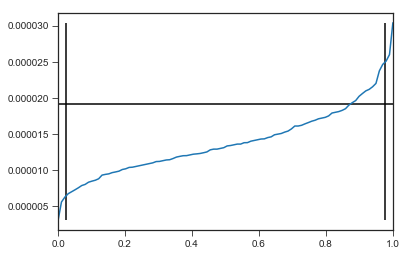

In [81]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45, 55]" and not CaseStatus'
condition_recon = 'WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'

quantiles=np.linspace(0, 1, num = 100)
df_ref_tomo_merged.query(condition_ref)['EdgeEnhance'].quantile(quantiles).plot()
plt.vlines([0.025, 0.975], df_ref_tomo_merged.query(condition_ref)['EdgeEnhance'].min(), 
                           df_ref_tomo_merged.query(condition_ref)['EdgeEnhance'].max())
m=df_recon_merged.query(condition_recon)['EdgeEnhance'].mean()
plt.hlines(m, xmin=0, xmax=1)

In [82]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45, 55]" and not CaseStatus'
condition_recon='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
quantiles=np.linspace(0,1, num=1000)
percentile_all_features=np.zeros(feature_cols.shape)

for i, feature in enumerate(feature_cols): 
    m=df_recon_merged.query(condition_recon)[feature].mean()
    q=df_ref_tomo_merged.query(condition_ref)[feature].quantile(quantiles).values
    percentile_all_features[i]=quantiles[np.abs(m-q).argmin()]

In [83]:
feature_cols

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 5th', u'graylevel 5thmean', u'graylevel 95th',
       u'graylevel 95thmean', u'graylevel entropy', u'graylevel kurtosis',
       u'graylevel max', u'graylevel mean', u'graylevel min',
       u'graylevel sigma', u'graylevel skewness', u'graylevel sum',
       u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage',
       u'runlength ShortRunEmphasis'],
      dtype='object')

In [84]:
percentile_all_features

array([ 0.87287287,  0.18718719,  0.58258258,  0.92392392,  0.95995996,
        0.98998999,  0.        ,  0.36836837,  0.62662663,  0.997998  ,
        0.86086086,  0.81681682,  0.86686687,  0.8978979 ,  0.38238238,
        0.97297297,  0.73273273,  0.8978979 ,  0.78678679,  0.66766767,
        0.92992993,  0.87487487,  0.45845846,  0.78478478,  0.995996  ,
        0.97597598,  0.        ,  0.03603604,  0.004004  ])

### Features for recon that are within [2.5%, 97.5%] percentile.

In [85]:
feature_cols[((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'graylevel 5th', u'graylevel 5thmean',
       u'graylevel 95th', u'graylevel 95thmean', u'graylevel entropy',
       u'graylevel kurtosis', u'graylevel max', u'graylevel mean',
       u'graylevel min', u'graylevel sigma', u'graylevel skewness',
       u'graylevel sum', u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength RunPercentage'],
      dtype='object')

### Features that are not

In [86]:
feature_cols[~((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'cooccurrence energy', u'cooccurrence entropy',
       u'cooccurrence inverseDifferenceMoment', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength ShortRunEmphasis'],
      dtype='object')

In [87]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45, 55]" and not CaseStatus'
condition_recon='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_ref_recon_perc=df_ref_tomo_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])
recon_mean=df_recon_merged.query(condition_recon)[feature_cols].mean()
recon_std=df_recon_merged.query(condition_recon)[feature_cols].std()
recon_cov=recon_std/recon_mean

df_recon_stats=pd.concat([df_ref_recon_perc, recon_mean.to_frame(name='mean').T, 
                          recon_std.to_frame(name='std').T, recon_cov.to_frame(name='CoV').T])

df_recon_stats.loc['at_percentile']=np.round(percentile_all_features, decimals=3)
df_recon_stats.loc['realism']=((percentile_all_features>0.025) & (percentile_all_features<0.975))
df_recon_stats.to_csv('tomo_phantom_recon_vs_human_study_realism_stats_20180308.csv')

## C-View

In [111]:
condition_tmp='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45, 55]"'
df_ref_cview_merged.shape, df_ref_cview_merged.query(condition_tmp).shape, df_ref_cview_merged.query(condition_tmp)['AccessionNumber'].unique().shape

((7593, 42), (1246, 42), (805L,))

In [351]:
condition_ref='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
df_ref_cview_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
0.025,0.000011,1.826234,4.329435,5310.8015,0.000690,0.000520,9.475943,10150770.0,300.410163,0.070918,...,0.509843,0.474529,-161.679650,56.475404,2116.71950,1.000000,0.001594,3732.620375,0.940446,0.999921
0.250,0.000016,1.864660,4.588288,8188.2450,0.000901,0.000614,9.600032,13383687.5,338.513400,0.076471,...,0.593189,0.713728,18.253875,62.438857,2393.07700,1.000005,0.001879,3757.024750,0.946629,0.999987
0.500,0.000019,1.885011,4.699776,9542.7030,0.001049,0.000672,9.657070,15886445.0,360.431250,0.079521,...,0.632582,0.814426,125.029600,65.874060,2609.15400,1.000015,0.002034,3768.225500,0.949429,0.999996
0.750,0.000022,1.905568,4.820696,10964.9600,0.001199,0.000734,9.711965,18296285.0,380.624825,0.082945,...,0.666295,0.930043,236.165300,69.357732,2827.94125,1.000051,0.002234,3779.468250,0.952252,0.999999
0.975,0.000027,1.945910,5.066959,13836.4825,0.001449,0.001007,9.820694,23452080.0,420.473012,0.089977,...,0.719244,1.124055,456.659350,76.258981,3381.18250,1.000485,0.002679,3800.368625,0.957547,1.000000


In [352]:
condition='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_cview_merged.query(condition)[feature_cols].mean().to_frame(name='mean').T

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
mean,0.000028,1.860666,4.582632,19867.9575,0.000928,0.001279,8.776353,9.486405e+06,491.677062,0.107242,...,0.730218,1.348789,129.281527,72.017706,2262.904625,1.000202,0.002935,3249.590375,0.933645,0.99995


In [353]:
df_cview_merged.query(condition)[feature_cols].std()/df_cview_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             0.035505
FD center                               0.010613
LBP                                     0.043361
cooccurrence clusterShade               0.023618
cooccurrence correlation                0.026489
cooccurrence energy                     0.077815
cooccurrence entropy                    0.003837
cooccurrence haralickCorrelation        0.052750
cooccurrence inertia                    0.012920
cooccurrence inverseDifferenceMoment    0.030211
graylevel 5th                          -0.018434
graylevel 5thmean                      -0.019061
graylevel 95th                          0.012650
graylevel 95thmean                      0.009411
graylevel entropy                       0.004462
graylevel kurtosis                      0.029220
graylevel max                           0.008106
graylevel mean                          0.158272
graylevel min                          -0.018836
graylevel sigma                         0.012558
graylevel skewness  

In [354]:
condition_ref='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
condition_cview='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
quantiles=np.linspace(0,1, num=1000)
percentile_all_features=np.zeros(feature_cols.shape)

for i, feature in enumerate(feature_cols): 
    m=df_cview_merged.query(condition_cview)[feature].mean()
    q=df_ref_cview_merged.query(condition_ref)[feature].quantile(quantiles).values
    percentile_all_features[i]=quantiles[np.abs(m-q).argmin()]

### Features for C-View that are within [2.5%, 97.5%] percentile.

In [355]:
feature_cols[((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'FD center', u'LBP', u'cooccurrence correlation', u'graylevel 5th',
       u'graylevel 5thmean', u'graylevel max', u'graylevel mean',
       u'graylevel min', u'graylevel sum', u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength ShortRunEmphasis'],
      dtype='object')

### Features that are not

In [356]:
feature_cols[~((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'EdgeEnhance', u'cooccurrence clusterShade', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 95th', u'graylevel 95thmean', u'graylevel entropy',
       u'graylevel kurtosis', u'graylevel sigma', u'graylevel skewness',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage'],
      dtype='object')

In [357]:
percentile_all_features

array([ 0.98298298,  0.20720721,  0.24124124,  1.        ,  0.3013013 ,
        0.995996  ,  0.        ,  0.01501502,  1.        ,  0.998999  ,
        0.71571572,  0.72372372,  1.        ,  0.997998  ,  0.01401401,
        0.98998999,  0.92092092,  0.55355355,  0.65765766,  0.98698699,
        0.996997  ,  0.51351351,  0.8978979 ,  0.11511512,  0.94494494,
        0.99399399,  0.        ,  0.00500501,  0.03403403])

In [358]:
condition_ref='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
condition_cview='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_ref_cview_perc=df_ref_cview_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])
cview_mean=df_cview_merged.query(condition_cview)[feature_cols].mean()
cview_std=df_cview_merged.query(condition_cview)[feature_cols].std()
cview_cov=cview_std/cview_mean

df_cview_stats=pd.concat([df_ref_cview_perc, cview_mean.to_frame(name='mean').T, 
                          cview_std.to_frame(name='std').T, cview_cov.to_frame(name='CoV').T])

df_cview_stats.loc['at_percentile']=np.round(percentile_all_features, decimals=3)
df_cview_stats.loc['realism']=((percentile_all_features>0.025) & (percentile_all_features<0.975))
df_cview_stats.to_csv('tomo_phantom_cview_vs_human_study_realism_stats_20180302.csv')